In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Activation
from tensorflow.python.framework import ops
ops.reset_default_graph()
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.datasets import cifar100
from keras.layers import Dense
import tensorflow_hub as hub
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import math
from keras_preprocessing.image import ImageDataGenerator


Using TensorFlow backend.
W0608 17:35:47.753675 139808984475520 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [2]:

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 2s 0us/step


array([96])

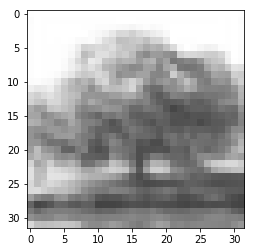

In [3]:
single_img = np.array(x_train[11])

single_img_reshaped = single_img.reshape(32,32,3)

plt.imshow(single_img_reshaped)
y_train[11]

In [0]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
from keras.utils import to_categorical

y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
print(y_train.shape,y_test.shape)

(50000, 100) (10000, 100)


In [6]:
num_classes=100
epochs=50
batch_size=64

img_height,img_width,channels= x_train.shape[1],x_train.shape[2],x_train.shape[3]
img_height,img_width,channels

(32, 32, 3)

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:], activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


W0608 17:35:55.314285 139808984475520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0608 17:35:55.347936 139808984475520 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
datagen =ImageDataGenerator( 
#                     rotation_range=45, 
                    width_shift_range=.15, 
                    height_shift_range=.15, 
                    horizontal_flip=True, 
#                     vertical_flip=True
#                     zoom_range=0.5
                    )

datagen.fit(x_train)

model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch=len(x_train) / 128, epochs=20,validation_data=(x_test,y_test))


Instructions for updating:
Use tf.cast instead.


W0608 17:35:59.154704 139808984475520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Epoch 1/20
391/390 [==============================] - 26s 66ms/step - loss: 4.2064 - acc: 0.0475 - val_loss: 3.8816 - val_acc: 0.0963
Epoch 2/20
391/390 [==============================] - 20s 50ms/step - loss: 3.7168 - acc: 0.1185 - val_loss: 3.5966 - val_acc: 0.1497
Epoch 3/20
391/390 [==============================] - 20s 51ms/step - loss: 3.4601 - acc: 0.1671 - val_loss: 3.2486 - val_acc: 0.2154
Epoch 4/20
391/390 [==============================] - 20s 51ms/step - loss: 3.2642 - acc: 0.1996 - val_loss: 3.0308 - val_acc: 0.2489
Epoch 5/20
391/390 [==============================] - 20s 50ms/step - loss: 3.1088 - acc: 0.2305 - val_loss: 2.8510 - val_acc: 0.2869
Epoch 6/20
391/390 [==============================] - 20s 50ms/step - loss: 2.9902 - acc: 0.2535 - val_loss: 2.7956 - val_acc: 0.3012
Epoch 7/20
391/390 [==============================] - 20s 50ms/step - loss: 2.8774 - acc: 0.2776 - val_loss: 2.6690 - val_acc: 0.3239
Epoch 8/20
391/390 [==============================] - 20s 50ms

In [0]:
model.save("cifar100.model")

In [0]:
new_model=tf.keras.models.load_model("cifar100.model")

In [13]:
ls


cifar100.model  sample_data/


In [14]:
pwd

'/content'